## Connection to MongoDB

In [1]:
import pymongo
import time
from pymongo import MongoClient
Client = MongoClient("mongodb://nbi-mongo.admin/")
db = Client.bridge
collection = db["SampleNbi2"]


### Search using a Bridge ID

In [2]:
#Get structureID
structureID = input()

C003211015


In [3]:
import pandas as pd
import re
pattern = re.compile(r'\s*' + re.escape(structureID) + r'.*', re.I)
result = collection.find({"structureNumber": {"$regex": pattern}})
df2 = pd.DataFrame(list(result))
pd.set_option('display.max_columns', None)
print("# of Nebraska Bridge with " + structureID + " in Structure ID: " + str(len(df2.index)))

# of Nebraska Bridge with C003211015 in Structure ID: 50


In [4]:
pipeline = [{"$match":{"year":2016, "structureNumber":{"$regex": pattern}}},
             {"$project":{"_id":0,"structureNumber":1,"coordinates":"$loc.coordinates"}}]
loc = collection.aggregate(pipeline)
df_loc = pd.DataFrame(list(loc))
df_loc[['longitude','latitude']] = pd.DataFrame(df_loc.coordinates.values.tolist())
locs = df_loc[['latitude','longitude']]
locs = locs.values.tolist()
structureNumber = list(df_loc['structureNumber'])

In [5]:
import folium
import datetime as dt
import random as rnd

t0 = dt.datetime.now()
m = folium.Map(location=locs[0], tiles = 'Stamen Terrain')

for i in range(0,len(locs)):
    folium.Marker(locs[i], popup=structureNumber[i], icon=folium.Icon(color='blue', icon='info-sign')).add_to(m)    
m

### Deck condition over years

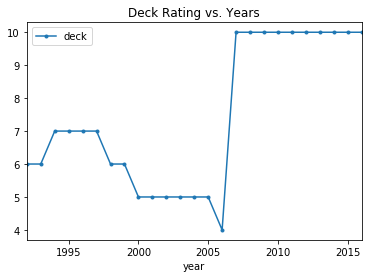

In [7]:
%matplotlib inline
temp = df2.groupby(['year'])['deck'].max().reset_index()
temp.loc[temp['deck'] == 'N', 'deck'] = 10
temp.loc[temp['deck'] == '', 'deck'] = 0
temp['deck'] = temp['deck'].astype(int)
temp.plot(y = 'deck', x = 'year', marker = '.', title = "Deck Rating vs. Years")

### Substructure condition over years

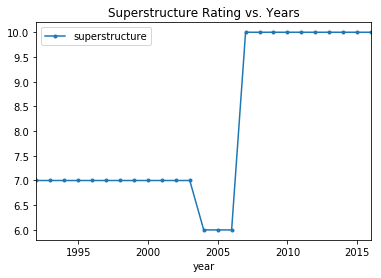

In [9]:
temp = df2.groupby(['year'])['superstructure'].max().reset_index()
temp.loc[temp['superstructure'] == 'N', 'superstructure'] = 10
temp.loc[temp['superstructure'] == '', 'superstructure'] = 0
temp['superstructure'] = temp['superstructure'].astype(int)
temp.plot(y = 'superstructure', x = 'year', marker = '.', title = "Superstructure Rating vs. Years")

### Change in Operating Rating over years


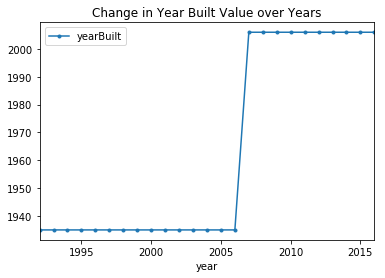

In [11]:
temp = df2.groupby(['year'])['yearBuilt'].max().reset_index()
temp['yearBuilt'] = temp['yearBuilt'].astype(int)
temp.plot(y='yearBuilt', x='year', marker='.', title = "Change in Year Built Value over Years")

### Length of Structure Improvement over years

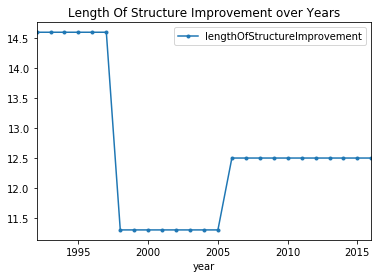

In [12]:
temp = df2.groupby(['year'])['lengthOfStructureImprovement'].max().reset_index()
temp['lengthOfStructureImprovement'] = temp['lengthOfStructureImprovement'].astype(float)
temp.plot(y = 'lengthOfStructureImprovement', x = 'year', marker = '.', title = "Length Of Structure Improvement over Years")

In [ ]:
temp = dataframe.groupby(['year'])['structuralEvaluation'].max().reset_index()
temp['structuralEvaluation'] = temp['structuralEvaluation'].astype(float)
temp.plot(y = 'structuralEvaluation', x = 'year', marker = '.', title = "Structural Evaluation vs. Years")